<a href="https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/Lockdown_Only_solution_to_contain_coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (14, 5)
mpl.rcParams['axes.grid'] = False


In [0]:
corona_confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [3]:
corona_confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673.0


In [0]:
corona_death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

In [5]:
corona_death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,5,6,6,6,6,6,6,6,6,10,10,15,16,19,22,22,27,29.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0


In [0]:
corona_recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [7]:
corona_recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,5,5,5,5,5,5,5,5,5,5,5,10,10,10,10,10,12,12,12,14,15,15,15,15,17,17,21,21,22,22,22,28,28,28,31,31,31,31,31,31,31,31,33,34,34,35,35,35,35,41.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,9,9,9,9,12,12,12,13,18,18,22,22,22,22,22,22,22,22,32,32,32,43,43,43,46,76,76,76,101,118,118,118,118,118,144,144.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,9,15,15,17,18,18,24,29,34,34,37,37,51,51,53,62,62,62,72,72,78,78,78,78,78,78,78,78,78,96,96,97,105,105,109,114.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,3,7,7,7,13,15,15,15,15,15,18,18,18,18,18,18,18,18,22,22,22,22,23,24,24,24,26,26,26,35,42,42,49.0


In [0]:
corona_confirmed_df=corona_confirmed_df.melt(id_vars=['Province/State','Country/Region','Lat','Long'])

In [9]:
corona_confirmed_df.head()

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0


In [0]:
corona_confirmed_df=corona_confirmed_df.rename({'variable':'Date','value': 'Confirmed'}, axis='columns')

In [11]:
corona_confirmed_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0


In [0]:
corona_death_df=corona_death_df.melt(id_vars=['Province/State','Country/Region','Lat','Long'])

In [0]:
corona_death_df=corona_death_df.rename({'variable':'Date','value': 'Death'}, axis='columns')

In [14]:
corona_death_df.head()

,Province/State,Country/Region,Lat,Long,Date,Death
0,NaN,Thailand,15.0000,101.0000,1/22/20,0.0
1,NaN,Japan,36.0000,138.0000,1/22/20,0.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0


In [0]:
corona_recovered_df=corona_recovered_df.melt(id_vars=['Province/State','Country/Region','Lat','Long']).rename({'variable':'Date','value': 'Recovered'}, axis='columns')

In [16]:
corona_recovered_df.head()

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,0.0
1,NaN,Japan,36.0000,138.0000,1/22/20,0.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0


In [0]:
combined_df = [corona_confirmed_df, corona_death_df, corona_recovered_df]
combined_df = [df.set_index(['Province/State','Country/Region','Lat','Long','Date']) for df in combined_df]
combined_df=combined_df[0].join(combined_df[1:])

In [18]:
combined_df.head()

Confirmed  ...  Recovered
Province/State Country/Region Lat     Long     Date                ...           
NaN            Thailand       15.0000 101.0000 1/22/20        2.0  ...        0.0
               Japan          36.0000 138.0000 1/22/20        2.0  ...        0.0
               Singapore      1.2833  103.8333 1/22/20        0.0  ...        0.0
               Nepal          28.1667 84.2500  1/22/20        0.0  ...        0.0
               Malaysia       2.5000  112.5000 1/22/20        0.0  ...        0.0

[5 rows x 3 columns]

In [0]:
combined_df=combined_df.reset_index()

In [20]:
combined_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0,0.0,0.0


In [0]:
combined_df[['Lat', 'Long','Confirmed','Death','Recovered']] = combined_df[['Lat', 'Long','Confirmed','Death','Recovered']].apply(pd.to_numeric) 

In [0]:
combined_df[['Date']] = combined_df[['Date']].apply(pd.to_datetime)

In [22]:
combined_df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                float64
Death                    float64
Recovered                float64
dtype: object

In [23]:
combined_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [0]:
combined_df=combined_df.rename({'Province/State':'State','Country/Region': 'Country'}, axis='columns')

In [25]:
combined_df.head()

,State,Country,Lat,Long,Date,Confirmed,Death,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [26]:
combined_df.head()

,State,Country,Lat,Long,Date,Confirmed,Death,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [27]:
combined_df.query("Country=='US' & State=='Washington'")

,State,Country,Lat,Long,Date,Confirmed,Death,Recovered
98,Washington,US,47.4009,-121.4905,2020-01-22,0.0,0.0,0.0
565,Washington,US,47.4009,-121.4905,2020-01-23,0.0,0.0,0.0
1032,Washington,US,47.4009,-121.4905,2020-01-24,0.0,0.0,0.0
1499,Washington,US,47.4009,-121.4905,2020-01-25,0.0,0.0,0.0
1966,Washington,US,47.4009,-121.4905,2020-01-26,0.0,0.0,0.0
2433,Washington,US,47.4009,-121.4905,2020-01-27,0.0,0.0,0.0
2900,Washington,US,47.4009,-121.4905,2020-01-28,0.0,0.0,0.0
3367,Washington,US,47.4009,-121.4905,2020-01-29,0.0,0.0,0.0
3834,Washington,US,47.4009,-121.4905,2020-01-30,0.0,0.0,0.0
4301,Washington,US,47.4009,-121.4905,2020-01-31,0.0,0.0,0.0


In [28]:
combined_df.query("Country=='China' & State=='Hubei'")

,State,Country,Lat,Long,Date,Confirmed,Death,Recovered
154,Hubei,China,30.9756,112.2707,2020-01-22,444.0,17.0,28.0
621,Hubei,China,30.9756,112.2707,2020-01-23,444.0,17.0,28.0
1088,Hubei,China,30.9756,112.2707,2020-01-24,549.0,24.0,31.0
1555,Hubei,China,30.9756,112.2707,2020-01-25,761.0,40.0,32.0
2022,Hubei,China,30.9756,112.2707,2020-01-26,1058.0,52.0,42.0
2489,Hubei,China,30.9756,112.2707,2020-01-27,1423.0,76.0,45.0
2956,Hubei,China,30.9756,112.2707,2020-01-28,3554.0,125.0,80.0
3423,Hubei,China,30.9756,112.2707,2020-01-29,3554.0,125.0,88.0
3890,Hubei,China,30.9756,112.2707,2020-01-30,4903.0,162.0,90.0
4357,Hubei,China,30.9756,112.2707,2020-01-31,5806.0,204.0,141.0


In [0]:
combined_df['Active']=combined_df['Confirmed'] - combined_df['Death'] - combined_df['Recovered']

In [30]:
combined_df.query("Country=='China' & State=='Hubei'")

,State,Country,Lat,Long,Date,Confirmed,Death,Recovered,Active
154,Hubei,China,30.9756,112.2707,2020-01-22,444.0,17.0,28.0,399.0
621,Hubei,China,30.9756,112.2707,2020-01-23,444.0,17.0,28.0,399.0
1088,Hubei,China,30.9756,112.2707,2020-01-24,549.0,24.0,31.0,494.0
1555,Hubei,China,30.9756,112.2707,2020-01-25,761.0,40.0,32.0,689.0
2022,Hubei,China,30.9756,112.2707,2020-01-26,1058.0,52.0,42.0,964.0
2489,Hubei,China,30.9756,112.2707,2020-01-27,1423.0,76.0,45.0,1302.0
2956,Hubei,China,30.9756,112.2707,2020-01-28,3554.0,125.0,80.0,3349.0
3423,Hubei,China,30.9756,112.2707,2020-01-29,3554.0,125.0,88.0,3341.0
3890,Hubei,China,30.9756,112.2707,2020-01-30,4903.0,162.0,90.0,4651.0
4357,Hubei,China,30.9756,112.2707,2020-01-31,5806.0,204.0,141.0,5461.0


In [0]:
max_df=combined_df[combined_df.Date==combined_df['Date'].max()]

Country by Max active cases

In [32]:
max_df[['Country','Active']].sort_values('Active',ascending=False).head(10)

,Country,Active
25701,Italy,26062.0
25703,Spain,10187.0
25840,Iran,9792.0
25696,Germany,9166.0
25839,China,8685.0
25842,France,7492.0
25841,"Korea, South",6832.0
25716,Switzerland,2669.0
26089,United Kingdom,1843.0
25784,US,1693.0


In [33]:
max_df[['Country','Confirmed']].groupby(['Country']).sum().sort_values('Confirmed',ascending=False).head(10)


,Confirmed
Country,
China,81058.0
Italy,31506.0
Iran,16169.0
Spain,11748.0
Germany,9257.0
"Korea, South",8320.0
France,7683.0
US,6421.0
Switzerland,2700.0


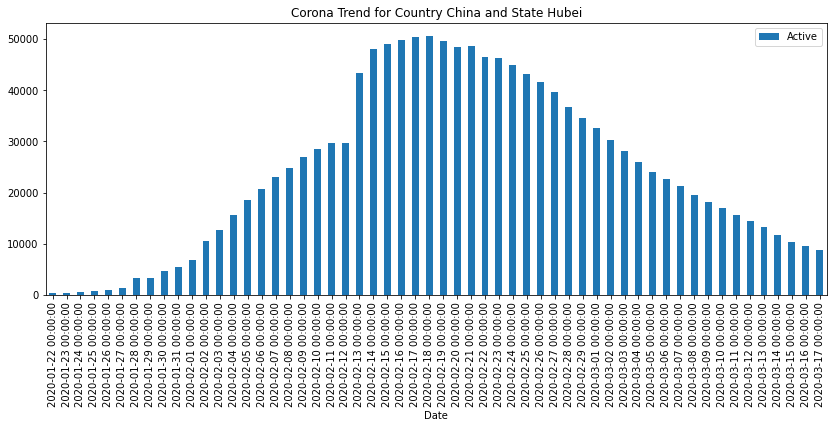

In [34]:
combined_df[['Date','Country','State','Active']].query("Country=='China' & State=='Hubei'").plot(x='Date',y='Active',kind='bar', title="Corona Trend for Country China and State Hubei")

On 23 January 2020, the central government of China imposed a lockdown in Wuhan and other cities in Hubei province

On 2 February 2020, China implemented a seven-day lockdown in which only one person per household was allowed to exit once each two days, and most of the highway exits were closed

On 13 March 2020, Huangshi and Qianjiang became the first Hubei cities to remove strict travel restrictions within part or all of their administrative confines

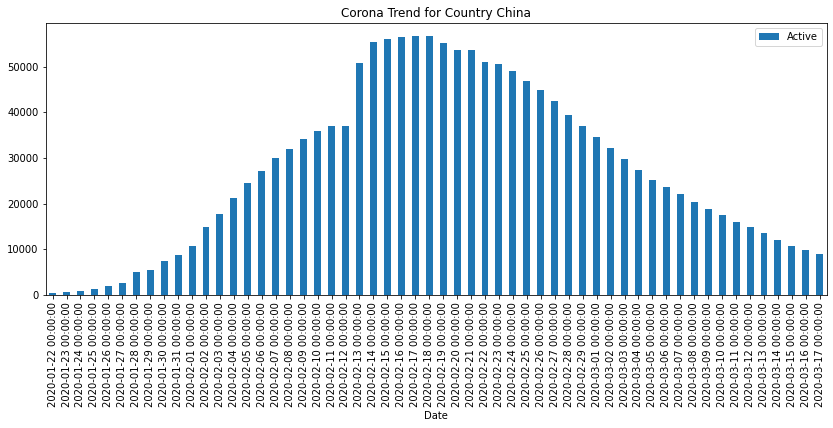

In [35]:
combined_df[['Date','Country','State','Active']].groupby(['Date','Country']).sum().query("Country=='China'").reset_index().plot(x='Date',y='Active',kind='bar',title="Corona Trend for Country China")

South Korea did not lockdown

South Korea tests anyone who had been in contact with a confirmed case, and tracks down by credit card activity, surveillance camera footage and mobile phone tracking those who are potentially exposed, a measure that has proved effective but has raised questions about privacy

South Korea had conducted almost 250,000 tests

Source - Forbes

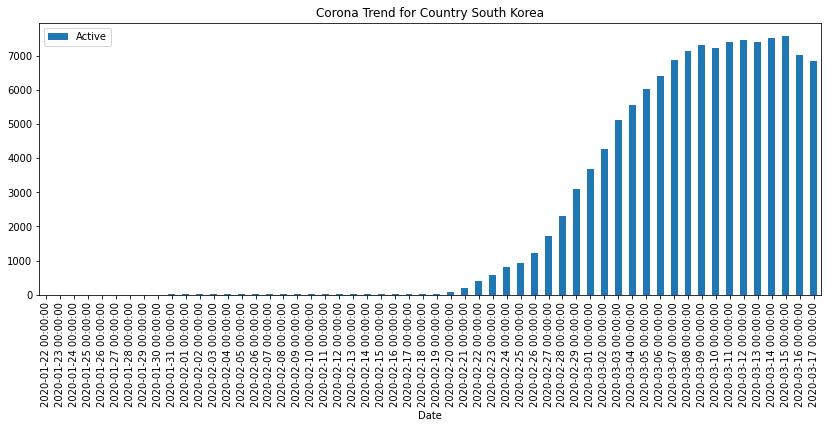

In [36]:
combined_df[['Date','Country','State','Active']].query("Country=='Korea, South'").plot(x='Date',y='Active',kind='bar',title="Corona Trend for Country South Korea")

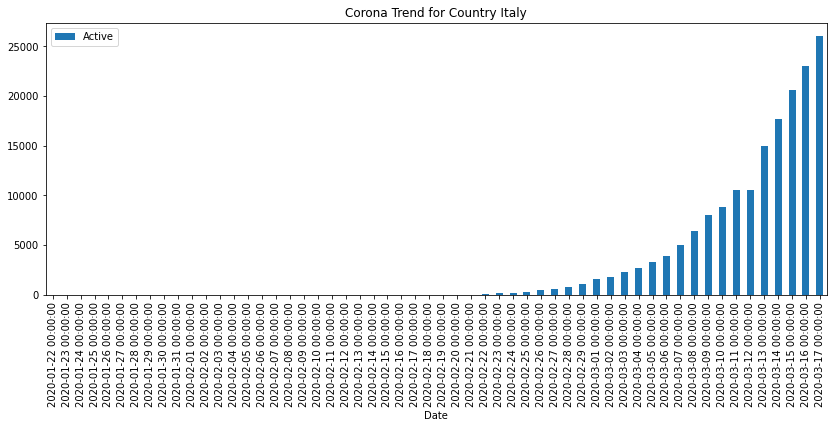

In [37]:
combined_df[['Date','Country','State','Active']].query("Country=='Italy'").plot(x='Date',y='Active',kind='bar', title="Corona Trend for Country Italy")

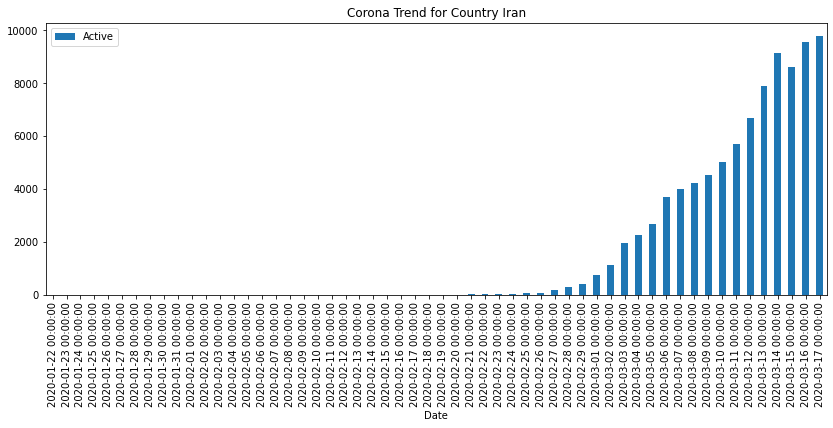

In [38]:
combined_df[['Date','Country','State','Active']].query("Country=='Iran'").plot(x='Date',y='Active',kind='bar', title="Corona Trend for Country Iran")

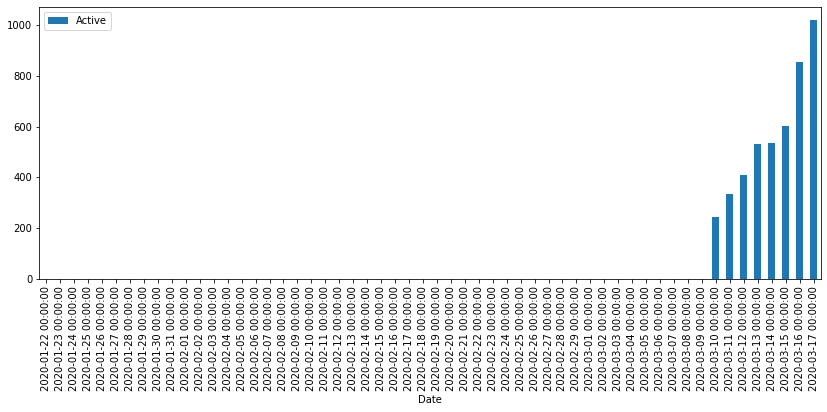

In [39]:
combined_df[['Date','Country','State','Active']].query("Country=='US' & State=='Washington'").plot(x='Date',y='Active',kind='bar')

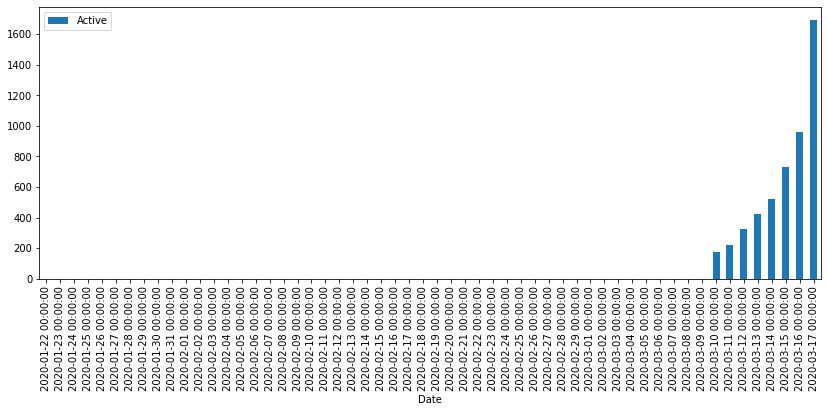

In [40]:
combined_df[['Date','Country','State','Active']].query("Country=='US' & State=='New York'").plot(x='Date',y='Active',kind='bar')

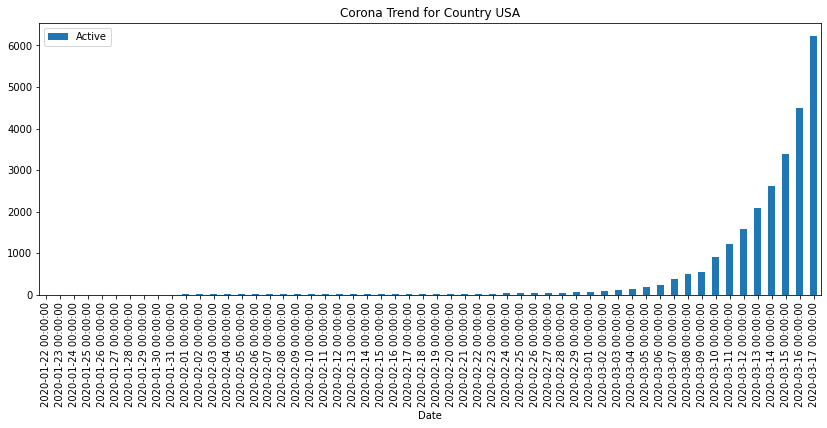

In [41]:
combined_df[['Date','Country','State','Active']].groupby(['Date','Country']).sum().query("Country=='US'").reset_index().plot(x='Date',y='Active',kind='bar',title="Corona Trend for Country USA")

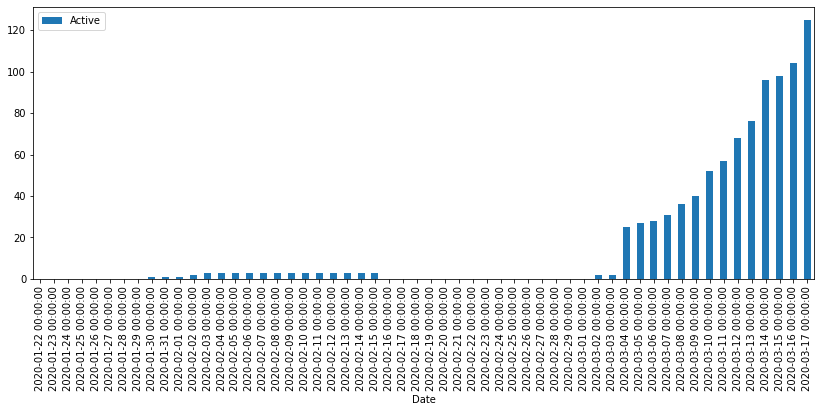

In [42]:
combined_df[['Date','Country','State','Active']].query("Country=='India'").plot(x='Date',y='Active',kind='bar')

In [43]:
combined_df.query("Country=='India'")

,State,Country,Lat,Long,Date,Confirmed,Death,Recovered,Active
15,NaN,India,21.0,78.0,2020-01-22,0.0,0.0,0.0,0.0
482,NaN,India,21.0,78.0,2020-01-23,0.0,0.0,0.0,0.0
949,NaN,India,21.0,78.0,2020-01-24,0.0,0.0,0.0,0.0
1416,NaN,India,21.0,78.0,2020-01-25,0.0,0.0,0.0,0.0
1883,NaN,India,21.0,78.0,2020-01-26,0.0,0.0,0.0,0.0
2350,NaN,India,21.0,78.0,2020-01-27,0.0,0.0,0.0,0.0
2817,NaN,India,21.0,78.0,2020-01-28,0.0,0.0,0.0,0.0
3284,NaN,India,21.0,78.0,2020-01-29,0.0,0.0,0.0,0.0
3751,NaN,India,21.0,78.0,2020-01-30,1.0,0.0,0.0,1.0
4218,NaN,India,21.0,78.0,2020-01-31,1.0,0.0,0.0,1.0


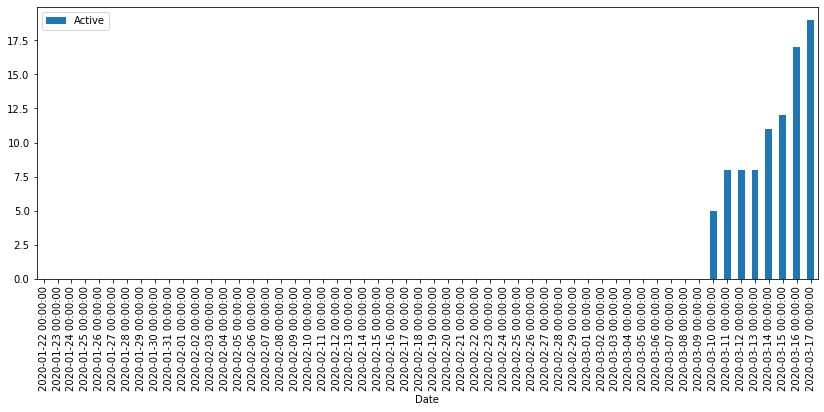

In [44]:
combined_df[['Date','Country','State','Active']].query("Country=='US' & State=='Arizona'").plot(x='Date',y='Active',kind='bar')